In [254]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [245]:
import sys,os
from pprint import pprint 
parent_dir = os.path.dirname(os.getcwd())
parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)
from Functions import Service as S
# 기본 세팅
S.plotSetting("seaborn-v0_8")
def blue(str):return S.colored_text(str,'blue')
def yellow(str):return S.colored_text(str,'yellow')
def red(str):return S.colored_text(str,'red')
def green(str):return S.colored_text(str,'green')

___ 🟡 PLOTSETTING. 
______ 📌 matplotlibn plot 한글화 Setting
___## OS platform 한글 세팅완료 ## ___


In [2]:
import seaborn as sns

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
생육데이터 = pd.read_excel("./Data/사전테스트-생육데이터.xlsx")

In [4]:
생육데이터.head()

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.0
1,B농가,4,20231006,1,엽장,mm,79.0
2,B농가,4,20231006,1,엽폭,mm,70.0
3,B농가,4,20231006,1,엽병장,mm,139.0
4,B농가,4,20231006,1,엽수,개,5.0


In [5]:
생육데이터.tail()

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
9868,E농가,32,20240426,9,엽수,개,8.0
9869,E농가,32,20240426,9,관부직경,mm,27.9
9870,E농가,32,20240426,9,화방 꽃수(소화수),개,0.0
9871,E농가,32,20240426,9,착과수,개,0.0
9872,E농가,32,20240426,9,최종화방차수,차,3.0


In [6]:
환경B = pd.read_csv("./Data/사전테스트-환경데이터/environmentsB.csv")

In [7]:
환경B = pd.read_csv("./Data/사전테스트-환경데이터/environmentsB.csv")
환경C = pd.read_csv("./Data/사전테스트-환경데이터/environmentsC.csv")
환경D = pd.read_csv("./Data/사전테스트-환경데이터/environmentsD.csv")
환경E = pd.read_csv("./Data/사전테스트-환경데이터/environmentsE.csv")


In [8]:
전체환경 = pd.concat([환경B, 환경C,환경D,환경E], ignore_index=True)

In [9]:
전체환경

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
17451,E농가,2024-04-26 19:00,0.0,6.0,287.09,62.90,23.20,75.07
17452,E농가,2024-04-26 20:00,0.0,6.0,330.85,67.27,20.88,79.33
17453,E농가,2024-04-26 21:00,0.0,6.0,356.48,68.93,19.61,82.90
17454,E농가,2024-04-26 22:00,0.0,6.0,386.59,69.66,18.47,91.01


In [10]:
환경B

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00,1.0,6.0,638.67,100.00,11.50,1.67
4736,B농가,2024-04-24 20:00,1.0,6.0,441.33,100.00,10.17,0.00
4737,B농가,2024-04-24 21:00,1.0,6.0,214.67,100.00,10.50,0.00
4738,B농가,2024-04-24 22:00,1.0,6.0,212.00,100.00,10.67,0.00


<div>
<h1>
환경 데이터셋 컬럼 정의
</h1>
<h3>
- farm : 농가  <br>
- datetime : 측정 시간 (단위 1시간) <br>
- supplyEC : 토양의 양분 농도, 많을수록 작물이 먹을 수 있는 양분이 많음을 의미 <br>
- supplyPH : PH 농도 <br>
- innerCO2 : 내부 이산화탄소 <br>
- innerHum : 내부 습도 <br>
- innerTemp : 내부 온도 <br>
- innerSolar : 내부 일사량 
</h3>
</div>

## 생육 데이터 체크

In [11]:
농가B = 생육데이터[생육데이터["시설아이디"] == "B농가"]

In [12]:
추가컬럼 = 농가B["조사항목"].unique()

In [13]:
농가B['표본번호']

0       1
1       1
2       1
3       1
4       1
       ..
2416    9
2417    9
2418    9
2419    9
2420    9
Name: 표본번호, Length: 2421, dtype: int64

In [14]:
농가B.head(20)

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.00
1,B농가,4,20231006,1,엽장,mm,79.00
2,B농가,4,20231006,1,엽폭,mm,70.00
3,B농가,4,20231006,1,엽병장,mm,139.00
4,B농가,4,20231006,1,엽수,개,5.00
5,B농가,4,20231006,1,관부직경,mm,12.39
6,B농가,4,20231006,1,화방 꽃수(소화수),개,0.00
7,B농가,4,20231006,1,착과수,개,0.00
8,B농가,4,20231006,1,최종화방차수,차,0.00
9,B농가,4,20231006,2,초장,mm,251.00


In [15]:
단위 = 농가B["단위"]

In [16]:
단위

0       mm
1       mm
2       mm
3       mm
4        개
        ..
2416     개
2417    mm
2418     개
2419     개
2420     차
Name: 단위, Length: 2421, dtype: object

In [17]:
농가B

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.00
1,B농가,4,20231006,1,엽장,mm,79.00
2,B농가,4,20231006,1,엽폭,mm,70.00
3,B농가,4,20231006,1,엽병장,mm,139.00
4,B농가,4,20231006,1,엽수,개,5.00
...,...,...,...,...,...,...,...
2416,B농가,33,20240424,9,엽수,개,11.00
2417,B농가,33,20240424,9,관부직경,mm,21.65
2418,B농가,33,20240424,9,화방 꽃수(소화수),개,1.00
2419,B농가,33,20240424,9,착과수,개,2.00


In [18]:
data = 농가B.iloc[:,0:4]

In [19]:
data['생육주사'].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [20]:
data

,시설아이디,생육주사,조사일자,표본번호
0,B농가,4,20231006,1
1,B농가,4,20231006,1
2,B농가,4,20231006,1
3,B농가,4,20231006,1
4,B농가,4,20231006,1
...,...,...,...,...
2416,B농가,33,20240424,9
2417,B농가,33,20240424,9
2418,B농가,33,20240424,9
2419,B농가,33,20240424,9


In [21]:
29 * 9

261

In [22]:
data2 = data.groupby('표본번호')

In [23]:
data2

In [24]:
추가컬럼

array(['초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수',
       '최종화방차수'], dtype=object)

## 환경데이터

In [25]:
환경B

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00,1.0,6.0,638.67,100.00,11.50,1.67
4736,B농가,2024-04-24 20:00,1.0,6.0,441.33,100.00,10.17,0.00
4737,B농가,2024-04-24 21:00,1.0,6.0,214.67,100.00,10.50,0.00
4738,B농가,2024-04-24 22:00,1.0,6.0,212.00,100.00,10.67,0.00


In [26]:
test = 환경B.drop(columns={"farm","datetime"})

In [27]:
환경B_하루 = 환경B.loc[6:28]

In [28]:
te = 환경B.drop(columns={"farm","datetime"})

In [29]:
환경B_하루

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
6,B농가,2023-09-22 00:00,1.0,6.0,543.17,97.00,15.00,0.00
7,B농가,2023-09-22 01:00,1.0,6.0,543.33,97.50,15.00,0.00
8,B농가,2023-09-22 02:00,1.0,6.0,544.00,96.83,15.00,0.00
9,B농가,2023-09-22 03:00,1.0,6.0,546.50,97.33,14.67,0.00
10,B농가,2023-09-22 04:00,1.0,6.0,551.50,97.00,14.00,0.00
11,B농가,2023-09-22 05:00,1.0,6.0,552.67,96.67,14.00,0.00
12,B농가,2023-09-22 06:00,1.0,6.0,551.00,96.83,14.33,3.33
13,B농가,2023-09-22 07:00,1.0,6.0,541.83,97.17,14.83,30.33
14,B농가,2023-09-22 08:00,1.0,6.0,528.33,91.50,16.33,104.33
15,B농가,2023-09-22 09:00,1.0,6.0,517.75,89.50,17.50,140.75


In [30]:
전체환경.drop(columns={"farm","datetime"})

,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,0.4,6.0,511.60,92.20,18.00,144.60
1,1.0,6.0,517.83,94.67,17.67,0.00
2,1.0,6.0,526.83,97.67,16.67,0.00
3,1.0,6.0,532.67,98.17,16.00,0.00
4,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...
17451,0.0,6.0,287.09,62.90,23.20,75.07
17452,0.0,6.0,330.85,67.27,20.88,79.33
17453,0.0,6.0,356.48,68.93,19.61,82.90
17454,0.0,6.0,386.59,69.66,18.47,91.01


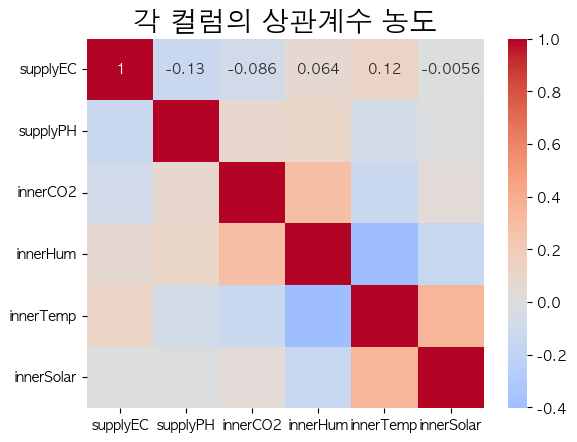

In [31]:
sns.heatmap(전체환경.drop(columns={"farm","datetime"}).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('각 컬럼의 상관계수 농도',size=20)
plt.show()

In [32]:
전체환경

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
17451,E농가,2024-04-26 19:00,0.0,6.0,287.09,62.90,23.20,75.07
17452,E농가,2024-04-26 20:00,0.0,6.0,330.85,67.27,20.88,79.33
17453,E농가,2024-04-26 21:00,0.0,6.0,356.48,68.93,19.61,82.90
17454,E농가,2024-04-26 22:00,0.0,6.0,386.59,69.66,18.47,91.01


In [33]:
전체환경2 = 전체환경.copy()

In [34]:
전체환경

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
17451,E농가,2024-04-26 19:00,0.0,6.0,287.09,62.90,23.20,75.07
17452,E농가,2024-04-26 20:00,0.0,6.0,330.85,67.27,20.88,79.33
17453,E농가,2024-04-26 21:00,0.0,6.0,356.48,68.93,19.61,82.90
17454,E농가,2024-04-26 22:00,0.0,6.0,386.59,69.66,18.47,91.01


In [35]:
환경B.head(30)

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
5,B농가,2023-09-21 23:00,1.0,6.0,548.33,97.33,14.67,0.00
6,B농가,2023-09-22 00:00,1.0,6.0,543.17,97.00,15.00,0.00
7,B농가,2023-09-22 01:00,1.0,6.0,543.33,97.50,15.00,0.00
8,B농가,2023-09-22 02:00,1.0,6.0,544.00,96.83,15.00,0.00
9,B농가,2023-09-22 03:00,1.0,6.0,546.50,97.33,14.67,0.00


In [36]:
usedata = 환경B[6:]

In [37]:
usedata

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
6,B농가,2023-09-22 00:00,1.0,6.0,543.17,97.00,15.00,0.00
7,B농가,2023-09-22 01:00,1.0,6.0,543.33,97.50,15.00,0.00
8,B농가,2023-09-22 02:00,1.0,6.0,544.00,96.83,15.00,0.00
9,B농가,2023-09-22 03:00,1.0,6.0,546.50,97.33,14.67,0.00
10,B농가,2023-09-22 04:00,1.0,6.0,551.50,97.00,14.00,0.00
...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00,1.0,6.0,638.67,100.00,11.50,1.67
4736,B농가,2024-04-24 20:00,1.0,6.0,441.33,100.00,10.17,0.00
4737,B농가,2024-04-24 21:00,1.0,6.0,214.67,100.00,10.50,0.00
4738,B농가,2024-04-24 22:00,1.0,6.0,212.00,100.00,10.67,0.00


In [38]:
len(usedata)

4734

In [39]:

for i in range(0,len(usedata),23):
    print(i)

0
23
46
69
92
115
138
161
184
207
230
253
276
299
322
345
368
391
414
437
460
483
506
529
552
575
598
621
644
667
690
713
736
759
782
805
828
851
874
897
920
943
966
989
1012
1035
1058
1081
1104
1127
1150
1173
1196
1219
1242
1265
1288
1311
1334
1357
1380
1403
1426
1449
1472
1495
1518
1541
1564
1587
1610
1633
1656
1679
1702
1725
1748
1771
1794
1817
1840
1863
1886
1909
1932
1955
1978
2001
2024
2047
2070
2093
2116
2139
2162
2185
2208
2231
2254
2277
2300
2323
2346
2369
2392
2415
2438
2461
2484
2507
2530
2553
2576
2599
2622
2645
2668
2691
2714
2737
2760
2783
2806
2829
2852
2875
2898
2921
2944
2967
2990
3013
3036
3059
3082
3105
3128
3151
3174
3197
3220
3243
3266
3289
3312
3335
3358
3381
3404
3427
3450
3473
3496
3519
3542
3565
3588
3611
3634
3657
3680
3703
3726
3749
3772
3795
3818
3841
3864
3887
3910
3933
3956
3979
4002
4025
4048
4071
4094
4117
4140
4163
4186
4209
4232
4255
4278
4301
4324
4347
4370
4393
4416
4439
4462
4485
4508
4531
4554
4577
4600
4623
4646
4669
4692
4715


In [40]:
usedata[:23]

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
6,B농가,2023-09-22 00:00,1.0,6.0,543.17,97.00,15.00,0.00
7,B농가,2023-09-22 01:00,1.0,6.0,543.33,97.50,15.00,0.00
8,B농가,2023-09-22 02:00,1.0,6.0,544.00,96.83,15.00,0.00
9,B농가,2023-09-22 03:00,1.0,6.0,546.50,97.33,14.67,0.00
10,B농가,2023-09-22 04:00,1.0,6.0,551.50,97.00,14.00,0.00
11,B농가,2023-09-22 05:00,1.0,6.0,552.67,96.67,14.00,0.00
12,B농가,2023-09-22 06:00,1.0,6.0,551.00,96.83,14.33,3.33
13,B농가,2023-09-22 07:00,1.0,6.0,541.83,97.17,14.83,30.33
14,B농가,2023-09-22 08:00,1.0,6.0,528.33,91.50,16.33,104.33
15,B농가,2023-09-22 09:00,1.0,6.0,517.75,89.50,17.50,140.75


In [41]:
usedata[23:47]

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
29,B농가,2023-09-23 00:00,1.0,6.0,574.00,97.00,12.00,0.00
30,B농가,2023-09-23 01:00,1.0,6.0,575.83,98.00,12.00,0.00
31,B농가,2023-09-23 02:00,1.0,6.0,579.00,97.50,11.50,0.00
32,B농가,2023-09-23 03:00,1.0,6.0,581.50,97.17,11.00,0.00
33,B농가,2023-09-23 04:00,1.0,6.0,581.67,97.33,11.00,0.00
34,B농가,2023-09-23 05:00,1.0,6.0,580.00,97.00,11.33,0.00
35,B농가,2023-09-23 06:00,1.0,6.0,579.00,97.83,11.17,8.00
36,B농가,2023-09-23 07:00,1.0,6.0,561.33,95.50,13.00,94.67
37,B농가,2023-09-23 08:00,1.0,6.0,524.83,86.33,16.50,217.67
38,B농가,2023-09-23 09:00,1.0,6.0,485.33,73.67,20.50,377.67


In [42]:
usedata["datetime"]

6       2023-09-22 00:00
7       2023-09-22 01:00
8       2023-09-22 02:00
9       2023-09-22 03:00
10      2023-09-22 04:00
              ...       
4735    2024-04-24 19:00
4736    2024-04-24 20:00
4737    2024-04-24 21:00
4738    2024-04-24 22:00
4739    2024-04-24 23:00
Name: datetime, Length: 4734, dtype: object

In [43]:
(4734 / 24 )/ 7

28.178571428571427

In [44]:
환경B3 = 환경B.copy()

In [45]:
# 1. 'datetime' 열을 datetime 형식으로 변환
환경B3['datetime'] = pd.to_datetime(환경B3['datetime'])

# 2. 'datetime' 열에서 주차(Week) 및 연도(Year) 계산
환경B3['Year'] = 환경B3['datetime'].dt.year
환경B3['Week'] = 환경B3['datetime'].dt.isocalendar().week

# 3. 주차와 연도를 기준으로 그룹화하고 집계 함수 적용
grouped = 환경B3.groupby(['Year', 'Week']).agg({
    'supplyEC': 'mean',          # 주차별 평균 supplyEC
    'supplyPH': 'mean',          # 주차별 평균 supplyPH
    'innerCO2': 'mean',          # 주차별 평균 innerCO2
    'innerHum': 'mean',          # 주차별 평균 innerHum
    'innerTemp': 'mean',         # 주차별 평균 innerTemp
    'innerSolar': 'mean'         # 주차별 평균 innerSolar
}).reset_index()

In [46]:
환경B3

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,Year,Week
0,B농가,2023-09-21 18:00:00,0.4,6.0,511.60,92.20,18.00,144.60,2023,38
1,B농가,2023-09-21 19:00:00,1.0,6.0,517.83,94.67,17.67,0.00,2023,38
2,B농가,2023-09-21 20:00:00,1.0,6.0,526.83,97.67,16.67,0.00,2023,38
3,B농가,2023-09-21 21:00:00,1.0,6.0,532.67,98.17,16.00,0.00,2023,38
4,B농가,2023-09-21 22:00:00,1.0,6.0,540.17,97.50,15.33,0.00,2023,38
...,...,...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00:00,1.0,6.0,638.67,100.00,11.50,1.67,2024,17
4736,B농가,2024-04-24 20:00:00,1.0,6.0,441.33,100.00,10.17,0.00,2024,17
4737,B농가,2024-04-24 21:00:00,1.0,6.0,214.67,100.00,10.50,0.00,2024,17
4738,B농가,2024-04-24 22:00:00,1.0,6.0,212.00,100.00,10.67,0.00,2024,17


In [47]:
환경B2 = 환경B.copy()

In [48]:
환경B["supplyEC"].unique()

array([0.4 , 1.  , 0.17, 0.  , 0.67, 0.33, 0.83, 2.  , 1.5 , 1.17, 0.5 ,
       1.1 , 1.2 , 1.3 , 1.23, 1.25, 1.27, 1.26, 1.15, 1.18, 1.4 , 1.33,
       0.6 , 0.75, 0.9 , 1.03, 1.14, 1.28, 1.08, 1.12])

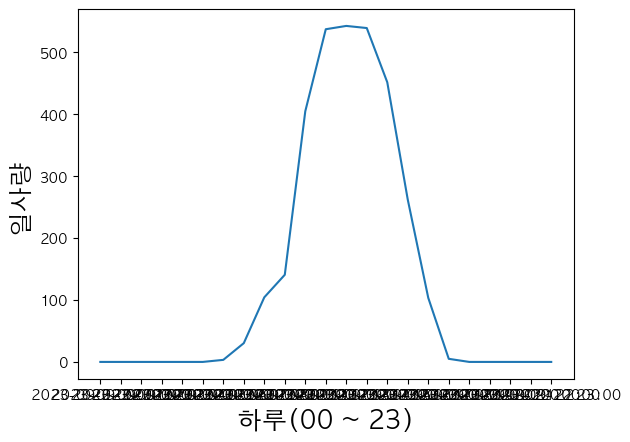

In [49]:
plt.plot(환경B_하루["datetime"],환경B_하루["innerSolar"])
plt.xlabel('하루(00 ~ 23)',size=18)
plt.ylabel('일사량 ',size=18)
plt.show()

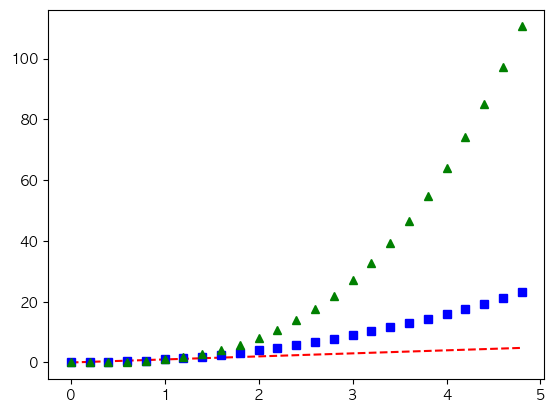

In [50]:

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [52]:
data = pd.read_csv("./Data/final.csv")

In [53]:
data

,Unnamed: 0,시설아이디,weeks,조사일자,표본번호,관부직경,엽병장,엽수,엽장,엽폭,...,초장,최종화방차수,화방 꽃수(소화수),supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,CO2
0,0,B농가,4,20231006,1,12.39,139.0,5.0,79.0,70.0,...,255.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
1,1,B농가,4,20231006,2,12.59,146.0,5.0,78.0,77.0,...,251.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
2,2,B농가,4,20231006,3,13.91,100.0,6.0,73.0,68.0,...,209.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
3,3,B농가,4,20231006,4,10.36,111.0,4.0,83.0,80.0,...,264.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
4,4,B농가,4,20231006,5,9.48,203.0,3.0,94.0,94.0,...,307.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,1029,E농가,32,20240426,5,19.17,220.0,7.0,78.0,70.0,...,352.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051
1030,1030,E농가,32,20240426,6,29.35,307.0,6.0,97.0,87.0,...,480.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051
1031,1031,E농가,32,20240426,7,29.94,288.0,8.0,83.0,70.0,...,452.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051
1032,1032,E농가,32,20240426,8,23.65,319.0,4.0,95.0,81.0,...,495.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051


In [55]:
data = data.drop(columns="Unnamed: 0")

In [56]:
data

,시설아이디,weeks,조사일자,표본번호,관부직경,엽병장,엽수,엽장,엽폭,개화수,초장,최종화방차수,화방 꽃수(소화수),supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,CO2
0,B농가,4,20231006,1,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
1,B농가,4,20231006,2,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
2,B농가,4,20231006,3,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
3,B농가,4,20231006,4,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
4,B농가,4,20231006,5,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0,153.33,983.83,152253.13,12967.80,2616.99,19739.88,145.143536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,E농가,32,20240426,5,19.17,220.0,7.0,78.0,70.0,0.0,352.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051
1030,E농가,32,20240426,6,29.35,307.0,6.0,97.0,87.0,0.0,480.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051
1031,E농가,32,20240426,7,29.94,288.0,8.0,83.0,70.0,0.0,452.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051
1032,E농가,32,20240426,8,23.65,319.0,4.0,95.0,81.0,0.0,495.0,3.0,0.0,7.36,143.83,7837.72,1471.23,545.58,1844.57,0.687051


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시설아이디       1034 non-null   object 
 1   weeks       1034 non-null   int64  
 2   조사일자        1034 non-null   int64  
 3   표본번호        1034 non-null   int64  
 4   관부직경        1034 non-null   float64
 5   엽병장         1034 non-null   float64
 6   엽수          1034 non-null   float64
 7   엽장          1034 non-null   float64
 8   엽폭          1034 non-null   float64
 9   개화수         1034 non-null   float64
 10  초장          1034 non-null   float64
 11  최종화방차수      1034 non-null   float64
 12  화방 꽃수(소화수)  1034 non-null   float64
 13  supplyEC    1034 non-null   float64
 14  supplyPH    1034 non-null   float64
 15  innerCO2    1034 non-null   float64
 16  innerHum    1034 non-null   float64
 17  innerTemp   1034 non-null   float64
 18  innerSolar  1034 non-null   float64
 19  CO2         1034 non-null  

In [87]:
inp = pd.read_csv("./Data/naraInput.csv")

In [88]:
inp2

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
0,B농가,0.4,6.0,511.60,92.20,18.00,144.60,1,0.378615
1,B농가,1.0,6.0,517.83,94.67,17.67,0.00,1,0.386185
2,B농가,1.0,6.0,526.83,97.67,16.67,0.00,1,0.397120
3,B농가,1.0,6.0,532.67,98.17,16.00,0.00,1,0.404216
4,B농가,1.0,6.0,540.17,97.50,15.33,0.00,1,0.413329
...,...,...,...,...,...,...,...,...,...
17451,E농가,0.0,6.0,287.09,62.90,23.20,75.07,33,0.018615
17452,E농가,0.0,6.0,330.85,67.27,20.88,79.33,33,0.029712
17453,E농가,0.0,6.0,356.48,68.93,19.61,82.90,33,0.036211
17454,E농가,0.0,6.0,386.59,69.66,18.47,91.01,33,0.043847


In [89]:
bdata = inp[inp["시설아이디"] == "B농가"]

In [90]:
Cdata = inp[inp["시설아이디"] == "C농가"]
Edata = inp[inp["시설아이디"] == "E농가"]
Ddata = inp[inp["시설아이디"] == "D농가"]

In [91]:
bdata

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
0,B농가,0.4,6.0,511.60,92.20,18.00,144.60,1,0.378615
1,B농가,1.0,6.0,517.83,94.67,17.67,0.00,1,0.386185
2,B농가,1.0,6.0,526.83,97.67,16.67,0.00,1,0.397120
3,B농가,1.0,6.0,532.67,98.17,16.00,0.00,1,0.404216
4,B농가,1.0,6.0,540.17,97.50,15.33,0.00,1,0.413329
...,...,...,...,...,...,...,...,...,...
4735,B농가,1.0,6.0,638.67,100.00,11.50,1.67,32,0.533013
4736,B농가,1.0,6.0,441.33,100.00,10.17,0.00,32,0.293232
4737,B농가,1.0,6.0,214.67,100.00,10.50,0.00,32,0.017825
4738,B농가,1.0,6.0,212.00,100.00,10.67,0.00,32,0.014581


In [92]:
bdata = bdata[(bdata['생육주차'] >= 4) & (bdata['생육주차'] <= 31)]
Cdata = Cdata[(Cdata['생육주차'] >= 4) & (Cdata['생육주차'] <= 31)]
Edata = Edata[(Edata['생육주차'] >= 4) & (Edata['생육주차'] <= 31)]
Ddata = Ddata[(Ddata['생육주차'] >= 4) & (Ddata['생육주차'] <= 31)]

In [93]:
bdata.head(10)

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
341,B농가,1.0,6.0,592.00,98.00,10.17,0.00,4,0.476306
342,B농가,1.0,6.0,594.00,98.17,9.67,0.00,4,0.478736
343,B농가,1.0,6.0,592.67,98.50,10.00,0.00,4,0.477120
344,B농가,1.0,6.0,591.83,98.67,10.00,0.00,4,0.476100
345,B농가,1.0,6.0,594.33,98.50,9.67,0.00,4,0.479137
346,B농가,1.0,6.0,598.17,98.83,9.00,0.00,4,0.483803
347,B농가,1.0,6.0,607.83,99.17,8.33,3.67,4,0.495541
348,B농가,1.0,6.0,606.83,95.50,8.33,64.17,4,0.494326
349,B농가,1.0,6.0,553.00,79.17,13.67,208.33,4,0.428919
350,B농가,1.0,6.0,502.33,59.83,19.00,328.33,4,0.367351


In [103]:
Ddata

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
9020,D농가,1.00,5.43,238.97,24.95,28.46,344.68,4,0.047794
9021,D농가,1.00,5.53,237.66,27.96,26.92,166.08,4,0.047532
9022,D농가,1.00,5.88,233.78,38.71,23.98,34.06,4,0.046756
9023,D농가,1.00,6.00,250.33,60.66,19.63,0.00,4,0.050066
9024,D농가,0.29,6.00,273.41,75.01,16.97,0.00,4,0.054682
...,...,...,...,...,...,...,...,...,...
13133,D농가,0.00,6.00,265.48,61.16,18.13,61.40,31,0.053096
13134,D농가,0.00,6.00,274.36,65.95,16.28,64.58,31,0.054872
13135,D농가,0.00,6.00,286.19,66.53,15.38,65.81,31,0.057238
13136,D농가,0.00,6.00,285.41,69.16,13.54,68.49,31,0.057082


In [138]:
solartest = Ddata[Ddata["생육주차"] == 7]
solartestE = Edata[Edata["생육주차"] == 8]

In [133]:
solartest.describe

<bound method NDFrame.describe of      시설아이디  supplyEC  supplyPH  innerCO2  innerHum  innerTemp  innerSolar  \
9271   D농가      1.00       6.0       0.0       0.0        0.0         0.0   
9272   D농가      1.00       6.0       0.0       0.0        0.0         0.0   
9273   D농가      0.43       6.0       0.0       0.0        0.0         0.0   
9274   D농가      0.00       6.0       0.0       0.0        0.0         0.0   
9275   D농가      0.00       6.0       0.0       0.0        0.0         0.0   
...    ...       ...       ...       ...       ...        ...         ...   
9433   D농가      1.00       6.0       0.0       0.0        0.0         0.0   
9434   D농가      0.55       6.0       0.0       0.0        0.0         0.0   
9435   D농가      0.00       6.0       0.0       0.0        0.0         0.0   
9436   D농가      0.00       6.0       0.0       0.0        0.0         0.0   
9437   D농가      0.00       6.0       0.0       0.0        0.0         0.0   

      생육주차  CO2  
9271     7  0.0  
9272 

In [ ]:
solartest

In [125]:
print(solartest["innerSolar"].max())

np.array(solartest["innerSolar"])

856.0


array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   2.03,  51.02,
       200.5 , 324.04, 415.71, 493.05, 411.37, 304.47, 192.15, 142.42,
       856.  , 856.  , 856.  , 856.  , 856.  , 856.  , 856.  , 856.  ,
       856.  , 856.  , 856.  , 856.  , 856.  , 856.  , 856.  , 856.  ,
       856.  , 856.  , 744.  , 595.53, 457.  , 457.  , 120.95,  63.  ,
       395.37, 547.  , 547.  , 547.  , 547.  , 547.  , 547.  , 547.  ,
       547.  , 547.  , 547.  , 547.  , 547.  , 547.  , 547.  , 547.  ,
       547.  , 547.  , 547.  , 535.11, 399.86, 425.  , 425.  , 258.7 ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ])

In [140]:
solartestE

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
13682,E농가,0.0,6.0,288.22,66.40,15.80,93.97,8,0.018902
13683,E농가,0.0,6.0,279.99,67.35,15.00,94.75,8,0.016815
13684,E농가,0.0,6.0,264.23,70.13,15.65,95.00,8,0.012818
13685,E농가,0.0,6.0,274.17,68.01,16.00,94.96,8,0.015339
13686,E농가,0.0,6.0,270.81,69.21,15.88,94.55,8,0.014487
...,...,...,...,...,...,...,...,...,...
13843,E농가,0.0,6.0,407.66,66.09,23.18,82.80,8,0.049190
13844,E농가,0.0,6.0,479.64,67.87,22.00,90.76,8,0.067442
13845,E농가,0.0,6.0,545.84,68.94,22.00,92.31,8,0.084229
13846,E농가,0.0,6.0,605.16,67.03,22.00,93.88,8,0.099272


In [216]:
# 각 주차별 최고 일사량 추출
data2 = bdata.loc[bdata.groupby('생육주차')['innerSolar'].idxmax()]
B최대일사량 = np.array(data2["innerSolar"])

data3 = Cdata.loc[Cdata.groupby('생육주차')['innerSolar'].idxmax()]
C최대일사량 = np.array(data3["innerSolar"])

data4 = Edata.loc[Edata.groupby('생육주차')['innerSolar'].idxmax()]
E최대일사량 = np.array(data4["innerSolar"])

data5 = Ddata.loc[Ddata.groupby('생육주차')['innerSolar'].idxmax()]
D최대일사량 = np.array(data5["innerSolar"])


In [217]:
print("B최대일사량\n" ,B최대일사량)
print("C최대일사량\n" ,C최대일사량)
print("E최대일사량\n" ,E최대일사량)
print("D최대일사량\n" ,D최대일사량)

B최대일사량
 [531.17 509.   486.5  435.25 426.5  412.   497.17 398.33 356.   373.33
 353.   316.83 324.17 361.5  371.83 390.   449.33 442.   448.5  474.5
 528.   556.   568.33 586.   651.67 619.67 641.5  657.33]
C최대일사량
 [511.67 544.14 472.47  93.31  96.44  94.08  94.12  90.59  93.31  96.68
  97.78  96.2   93.59  94.83  84.59  89.27  92.    92.    93.22  92.
  94.    89.32  88.75  91.63  93.24  88.83  89.12]
E최대일사량
 [505.53 533.65 461.29 471.29  96.    98.    95.    95.    93.    94.1
  97.    96.    96.    96.    97.    87.27  93.5   96.    94.25  95.
  96.    98.    95.17  95.    98.59  99.    99.   100.  ]
D최대일사량
 [344.68 856.    96.     0.    95.07  98.    96.55  95.    91.75  94.
  96.    96.02  94.84  95.    96.    87.56  91.7   95.    95.44  96.
  95.    97.    95.5   94.    97.    98.    96.    95.97]


In [208]:
data5 = data5.drop(data5.index[3:4])

In [209]:
# data2["최대일사량"] = B최대일사량
# data3["최대일사량"] = C최대일사량
# data4["최대일사량"] = E최대일사량
# data5["최대일사량"] = D최대일사량

In [223]:
data5["생육주차"].index[3]

9271

In [225]:
data5 = data5.drop(data5["생육주차"].index[3])

In [226]:
combineinput = pd.concat([data2,data3,data4,data5], ignore_index=True)

In [228]:
combineinput

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
0,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186
1,B농가,1.0,6.0,1022.67,33.00,23.83,509.00,5,0.999599
2,B농가,1.0,6.0,1023.00,54.00,18.83,486.50,6,1.000000
3,B농가,1.0,6.0,1023.00,100.00,23.60,435.25,7,1.000000
4,B농가,1.0,6.0,1023.00,52.50,22.67,426.50,8,1.000000
...,...,...,...,...,...,...,...,...,...
105,D농가,0.0,6.0,876.41,88.00,10.00,94.00,27,0.175282
106,D농가,0.0,6.0,669.08,89.64,12.64,97.00,28,0.133816
107,D농가,0.0,6.0,528.26,88.58,8.00,98.00,29,0.105652
108,D농가,0.0,6.0,456.44,80.84,10.00,96.00,30,0.091288


In [212]:
data5.

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2,최대일사량
9020,D농가,1.00,5.43,238.97,24.95,28.46,344.68,4,0.047794,344.68
9045,D농가,0.98,5.90,234.00,28.00,30.00,856.00,5,0.046800,856.00
9156,D농가,0.00,6.00,321.96,42.16,2.07,96.00,6,0.064392,96.00
9603,D농가,0.00,6.00,530.64,89.00,18.00,95.07,8,0.106128,95.07
9743,D농가,0.00,6.00,535.66,88.44,10.00,98.00,9,0.107132,98.00
9745,D농가,0.00,6.00,587.74,90.00,11.00,96.55,10,0.117548,96.55
9896,D농가,0.00,6.00,1918.93,90.04,14.40,95.00,11,0.383786,95.00
10042,D농가,0.00,6.00,1028.33,88.01,9.00,91.75,12,0.205666,91.75
10161,D농가,0.00,6.00,2174.16,86.78,14.41,94.00,13,0.434832,94.00
10305,D농가,1.00,6.00,1907.52,92.03,14.00,96.00,14,0.381504,96.00


In [211]:
data5["innerCO2"]

9020      238.97
9045      234.00
9156      321.96
9603      530.64
9743      535.66
9745      587.74
9896     1918.93
10042    1028.33
10161    2174.16
10305    1907.52
10559    1638.15
10626    1036.72
10726    4361.16
10983    1343.01
11155    5000.00
11248     741.53
11391     805.32
11656     971.87
11751     812.39
11918    4002.75
12074    1674.30
12292     804.43
12339     876.41
12620     669.08
12689     528.26
12857     456.44
13000     354.76
Name: innerCO2, dtype: float64

In [218]:
D최대일사량.shape

(28,)

In [219]:
D최대일사량 = np.delete(D최대일사량,3)

In [220]:
D최대일사량

array([344.68, 856.  ,  96.  ,  95.07,  98.  ,  96.55,  95.  ,  91.75,
        94.  ,  96.  ,  96.02,  94.84,  95.  ,  96.  ,  87.56,  91.7 ,
        95.  ,  95.44,  96.  ,  95.  ,  97.  ,  95.5 ,  94.  ,  97.  ,
        98.  ,  96.  ,  95.97])

In [96]:
inp["innerSolar"]

0        144.60
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
17451     75.07
17452     79.33
17453     82.90
17454     91.01
17455     93.68
Name: innerSolar, Length: 17456, dtype: float64

In [141]:
solartest

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
9271,D농가,1.00,6.0,0.0,0.0,0.0,0.0,7,0.0
9272,D농가,1.00,6.0,0.0,0.0,0.0,0.0,7,0.0
9273,D농가,0.43,6.0,0.0,0.0,0.0,0.0,7,0.0
9274,D농가,0.00,6.0,0.0,0.0,0.0,0.0,7,0.0
9275,D농가,0.00,6.0,0.0,0.0,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...,...,...
9433,D농가,1.00,6.0,0.0,0.0,0.0,0.0,7,0.0
9434,D농가,0.55,6.0,0.0,0.0,0.0,0.0,7,0.0
9435,D농가,0.00,6.0,0.0,0.0,0.0,0.0,7,0.0
9436,D농가,0.00,6.0,0.0,0.0,0.0,0.0,7,0.0


In [162]:
outp = pd.read_csv("./Data/final.csv")
outp.head()

,Unnamed: 0,시설아이디,weeks,조사일자,표본번호,관부직경,엽병장,엽수,엽장,엽폭,...,초장,최종화방차수,화방 꽃수(소화수),supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,CO2
0,0,B농가,4,20231006,1,12.39,139.0,5.0,79.0,70.0,...,255.0,0.0,0.0,153.33,983.83,152253.13,12967.8,2616.99,19739.88,145.143536
1,1,B농가,4,20231006,2,12.59,146.0,5.0,78.0,77.0,...,251.0,0.0,0.0,153.33,983.83,152253.13,12967.8,2616.99,19739.88,145.143536
2,2,B농가,4,20231006,3,13.91,100.0,6.0,73.0,68.0,...,209.0,0.0,0.0,153.33,983.83,152253.13,12967.8,2616.99,19739.88,145.143536
3,3,B농가,4,20231006,4,10.36,111.0,4.0,83.0,80.0,...,264.0,0.0,0.0,153.33,983.83,152253.13,12967.8,2616.99,19739.88,145.143536
4,4,B농가,4,20231006,5,9.48,203.0,3.0,94.0,94.0,...,307.0,0.0,0.0,153.33,983.83,152253.13,12967.8,2616.99,19739.88,145.143536


In [163]:
outp = outp.drop(columns="Unnamed: 0")

In [164]:
put = outp.iloc[:,0:13]

In [165]:
put = put[put["weeks"] <= 31]

In [230]:
put = put.drop(columns="조사일자")

In [231]:
put

,시설아이디,weeks,표본번호,관부직경,엽병장,엽수,엽장,엽폭,개화수,초장,최종화방차수,화방 꽃수(소화수)
0,B농가,4,1,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0
1,B농가,4,2,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0
2,B농가,4,3,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0
3,B농가,4,4,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0
4,B농가,4,5,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,E농가,31,5,21.82,291.0,4.0,87.0,80.0,0.0,435.0,3.0,0.0
1021,E농가,31,6,29.90,355.0,7.0,93.0,85.0,1.0,485.0,3.0,0.0
1022,E농가,31,7,29.11,270.0,7.0,110.0,78.0,0.0,453.0,3.0,0.0
1023,E농가,31,8,24.38,335.0,9.0,128.0,107.0,0.0,479.0,3.0,0.0


In [169]:
test = put[put["시설아이디"] == "D농가"]

In [177]:
test2 = test[test["weeks"] == 7]

In [179]:
test2[test2.columns[4:]].mean()

관부직경           22.457778
엽병장            84.666667
엽수              5.888889
엽장             99.222222
엽폭             88.222222
개화수             2.777778
초장            228.111111
최종화방차수          1.000000
화방 꽃수(소화수)      2.555556
dtype: float64

In [238]:
put = put.rename(columns={"weeks" : "생육주차"})
put

,시설아이디,생육주차,표본번호,관부직경,엽병장,엽수,엽장,엽폭,개화수,초장,최종화방차수,화방 꽃수(소화수)
0,B농가,4,1,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0
1,B농가,4,2,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0
2,B농가,4,3,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0
3,B농가,4,4,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0
4,B농가,4,5,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,E농가,31,5,21.82,291.0,4.0,87.0,80.0,0.0,435.0,3.0,0.0
1021,E농가,31,6,29.90,355.0,7.0,93.0,85.0,1.0,485.0,3.0,0.0
1022,E농가,31,7,29.11,270.0,7.0,110.0,78.0,0.0,453.0,3.0,0.0
1023,E농가,31,8,24.38,335.0,9.0,128.0,107.0,0.0,479.0,3.0,0.0


In [233]:
combineinput

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2
0,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186
1,B농가,1.0,6.0,1022.67,33.00,23.83,509.00,5,0.999599
2,B농가,1.0,6.0,1023.00,54.00,18.83,486.50,6,1.000000
3,B농가,1.0,6.0,1023.00,100.00,23.60,435.25,7,1.000000
4,B농가,1.0,6.0,1023.00,52.50,22.67,426.50,8,1.000000
...,...,...,...,...,...,...,...,...,...
105,D농가,0.0,6.0,876.41,88.00,10.00,94.00,27,0.175282
106,D농가,0.0,6.0,669.08,89.64,12.64,97.00,28,0.133816
107,D농가,0.0,6.0,528.26,88.58,8.00,98.00,29,0.105652
108,D농가,0.0,6.0,456.44,80.84,10.00,96.00,30,0.091288


In [240]:
fdata = pd.merge(combineinput, put, on=['시설아이디', '생육주차'])

In [241]:
fdata

,시설아이디,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,생육주차,CO2,표본번호,관부직경,엽병장,엽수,엽장,엽폭,개화수,초장,최종화방차수,화방 꽃수(소화수)
0,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186,1,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0
1,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186,2,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0
2,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186,3,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0
3,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186,4,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0
4,B농가,0.0,6.0,1022.33,45.17,26.33,531.17,4,0.999186,5,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,D농가,0.0,6.0,456.44,80.84,10.00,96.00,30,0.091288,5,34.79,180.0,8.0,90.0,81.0,4.0,348.0,3.0,0.0
967,D농가,0.0,6.0,456.44,80.84,10.00,96.00,30,0.091288,6,27.74,190.0,7.0,104.0,84.0,0.0,342.0,3.0,0.0
968,D농가,0.0,6.0,456.44,80.84,10.00,96.00,30,0.091288,7,30.32,217.0,8.0,92.0,88.0,2.0,342.0,3.0,0.0
969,D농가,0.0,6.0,456.44,80.84,10.00,96.00,30,0.091288,8,29.50,217.0,6.0,86.0,72.0,0.0,367.0,3.0,0.0


In [244]:
input_cols =['생육주차','supplyEC', 'supplyPH',
       'innerCO2', 'innerHum', 'innerTemp', 'innerSolar', 'CO2']
output_cols = ['관부직경', '엽병장', '엽수',
       '엽장', '엽폭', '개화수', '초장', '최종화방차수', '화방 꽃수(소화수)']
training_table = fdata.loc[:,input_cols]
target_table= fdata.loc[:,output_cols]

In [248]:
target_table

,관부직경,엽병장,엽수,엽장,엽폭,개화수,초장,최종화방차수,화방 꽃수(소화수)
0,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0
1,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0
2,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0
3,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0
4,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
966,34.79,180.0,8.0,90.0,81.0,4.0,348.0,3.0,0.0
967,27.74,190.0,7.0,104.0,84.0,0.0,342.0,3.0,0.0
968,30.32,217.0,8.0,92.0,88.0,2.0,342.0,3.0,0.0
969,29.50,217.0,6.0,86.0,72.0,0.0,367.0,3.0,0.0


In [247]:
training_table

,생육주차,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,CO2
0,4,0.0,6.0,1022.33,45.17,26.33,531.17,0.999186
1,4,0.0,6.0,1022.33,45.17,26.33,531.17,0.999186
2,4,0.0,6.0,1022.33,45.17,26.33,531.17,0.999186
3,4,0.0,6.0,1022.33,45.17,26.33,531.17,0.999186
4,4,0.0,6.0,1022.33,45.17,26.33,531.17,0.999186
...,...,...,...,...,...,...,...,...
966,30,0.0,6.0,456.44,80.84,10.00,96.00,0.091288
967,30,0.0,6.0,456.44,80.84,10.00,96.00,0.091288
968,30,0.0,6.0,456.44,80.84,10.00,96.00,0.091288
969,30,0.0,6.0,456.44,80.84,10.00,96.00,0.091288


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score


# 예시 데이터 (training_table과 target_table이 이미 존재한다고 가정)
# training_table = pd.DataFrame(...)
# target_table = pd.DataFrame(...)

# 데이터 분할
train_input, test_input, train_target, test_target = \
    train_test_split(training_table,
                     target_table, 
                     test_size=0.2,
                     random_state=42)

def linear_regressor_prdict():
    ## Linear Regression model 비교
    lin_regressor = LinearRegression()
    multi_output_regressor_lin = MultiOutputRegressor(lin_regressor)
    multi_output_regressor_lin.fit(train_input, train_target)
    y_pred_lin = multi_output_regressor_lin.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_lin)
    rmse = np.sqrt(mse)
    
    #### 교차검증 
    scores_cv = cross_val_score(multi_output_regressor_lin,train_input,train_target,scoring='neg_mean_squared_error',cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print(yellow(f"Linear regression model RMSE: {rmse:.2f}"))
    print("\t ",red(f"LR cv score : {rmse_cv}"))
    print("\t ",green(f"LR cv RMSE  average : {rmse_cv.mean():.2f}"))
linear_regressor_prdict()
def knn_regressor_predict():
    ## KNN regression model
    knn_regressor = KNeighborsRegressor(n_neighbors=3)
    ## Multi Output Setting
    multi_output_regressor_knn = MultiOutputRegressor(knn_regressor)
    multi_output_regressor_knn.fit(train_input, train_target)

    score = multi_output_regressor_knn.score(test_input, test_target)
    y_pred_knn = multi_output_regressor_knn.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_knn)
    rmse = np.sqrt(mse)
    # print(yellow(f'KNN(3) regression model score: {score}'))
    print(yellow(f'KNN(3) regression model RMSE: {rmse:.2f}'))
    #### 교차검증 
    scores_cv = cross_val_score(multi_output_regressor_knn,train_input,train_target,scoring='neg_mean_squared_error',cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print("\t ",red(f"KNN cv score : {rmse_cv}"))
    print("\t ",green(f"KNN cv RMSE average : {rmse_cv.mean():.2f}"))

    predictions = multi_output_regressor_knn.predict(test_input)

knn_regressor_predict()
def xgboost_regressor_predict():
    xg_reg = XGBRegressor()
    multi_output_regressor_knn = MultiOutputRegressor(xg_reg)
    multi_output_regressor_knn.fit(train_input, train_target)

    score = multi_output_regressor_knn.score(test_input, test_target)
    y_pred_xg = multi_output_regressor_knn.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_xg)
    rmse = np.sqrt(mse)
    # print(yellow(f'KNN(3) regression model score: {score}'))
    print(yellow(f'XGBoost(3) regression model RMSE: {rmse:.2f}'))
    ### 교찯검증
    scores_cv = cross_val_score(multi_output_regressor_knn,train_input,train_target,scoring='neg_mean_squared_error',cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print("\t ",red(f"XGB cv score : {rmse_cv}"))
    print("\t ",green(f"XGB cv RMSE average : {rmse_cv.mean():.2f}"))
xgboost_regressor_predict()

Linear regression model RMSE: 21.54
	  LR cv score : [21.37956959 25.59655952 23.32832372 22.7629275  21.06559608 22.20064566
 22.53277214 23.20962517 21.6542525  25.93104476]
	  LR cv RMSE  average : 22.97
KNN(3) regression model RMSE: 17.29
	  KNN cv score : [16.58258719 18.98731314 18.90805403 16.26162898 19.00349577 18.04905647
 20.45652084 18.39316093 19.04084874 19.35222974]
	  KNN cv RMSE average : 18.50
XGBoost(3) regression model RMSE: 16.27
	  XGB cv score : [16.70553021 18.54690509 18.14960073 15.61270379 17.73157938 17.10149931
 19.53009334 17.35609698 17.01437271 18.32705595]
	  XGB cv RMSE average : 17.61


In [250]:
train_input, test_input, train_target, test_target = \
    train_test_split(training_table,
                     target_table, 
                     test_size=0.2,
                     random_state=42)

In [256]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=0)

In [261]:
model.fit(train_input,train_target)

RandomForestRegressor(random_state=0)

In [262]:
resu = model.predict(test_input)

In [269]:
print(resu.shape)
print(test_input.shape)

(195, 9)
(195, 8)


In [263]:
mse = mean_squared_error(test_input,resu)
print(f'Mean Squared Error: {mse}')

ValueError: y_true and y_pred have different number of output (8!=9)